In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dtreeviz

In [2]:
#データ読み込み
train = pd.read_csv("../dataset/train.csv")
target = train[["Survived","Pclass","Fare"]]
x_target = target[["Pclass","Fare"]]
t_target = target["Survived"]
features = list(x_target.columns)

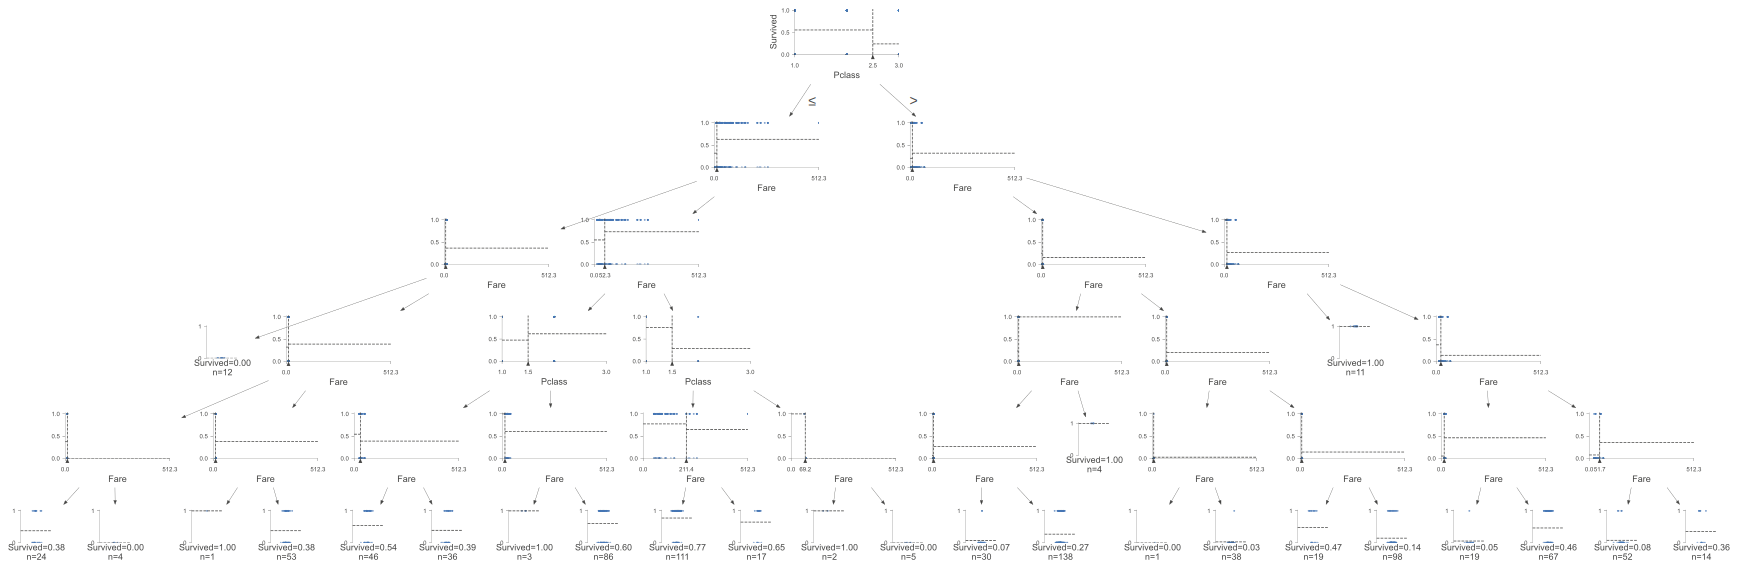

In [5]:
tree = DecisionTreeRegressor(max_depth=5, random_state=117117)
tree.fit(x_target.values, t_target.values)
viz = dtreeviz.model(tree, x_target, t_target,feature_names=features, target_name="Survived")
viz.view()

C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


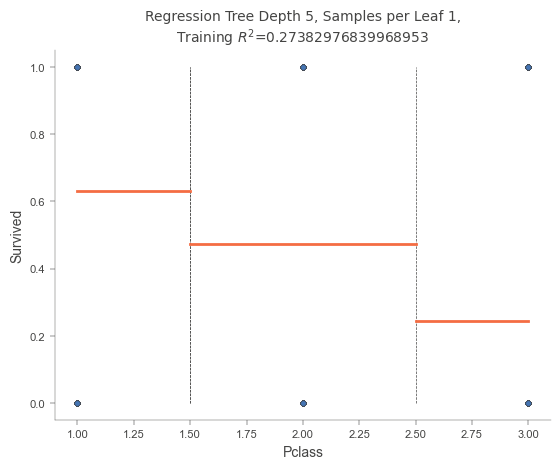

In [25]:
viz.rtree_feature_space(features=['Pclass'])

C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


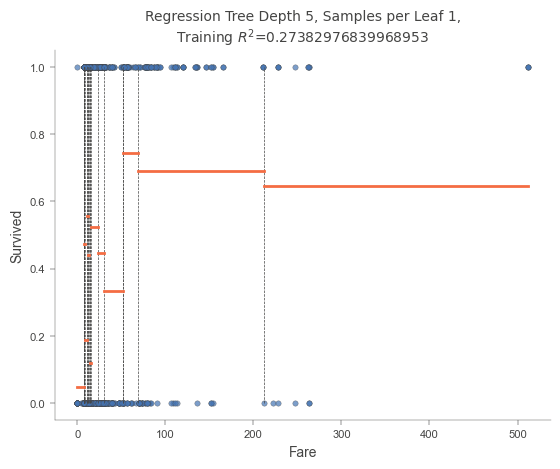

In [26]:
viz.rtree_feature_space(features=['Fare'])

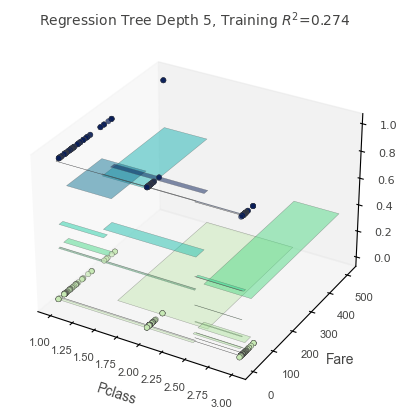

In [27]:
viz.rtree_feature_space3D(features=features,
                                 fontsize=10,
                                 elev=30, azim=300,
                                 show={'splits', 'title'},
                                 colors={'tessellation_alpha': .5})

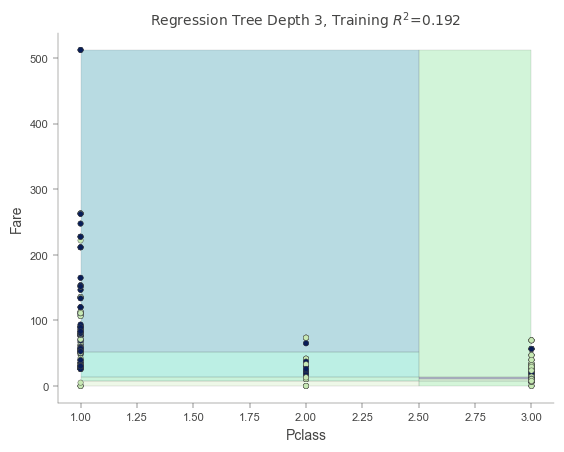

In [7]:
viz.rtree_feature_space(features=features)

In [8]:
#データ読み込み
test = pd.read_csv("../dataset/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
x_test = test[["Pclass","Fare"]]

In [10]:
t_test = tree.predict(x_test)

C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names


In [11]:
t_test = np.where(t_test >= 0.5, 1, 0)

In [12]:
print(t_test)

[0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 0]


In [13]:
x_test["Survived"] = t_test
t_output = x_test["Survived"]
t_output.index = t_output.index + 892
t_output.index.rename('PassengerId', inplace=True)
# DataFrameをCSVに出力
t_output.to_csv("output_Decisiontree_reg.csv")

C:\Users\logihaal\AppData\Local\Temp\ipykernel_23372\3940311572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
